# Test Model in data test


Load the models in sklearn form

In [36]:
import numpy as np
import pandas as pd
import pickle
from sklearn.externals import joblib
from collections import namedtuple
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR,LinearSVR,NuSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,make_scorer,f1_score,accuracy_score
from keras.models import model_from_json
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
from keras.wrappers.scikit_learn import KerasRegressor
from keras import losses
from keras.optimizers import RMSprop, Adam, SGD, Nadam
import matplotlib.pyplot as plt
import math
import datetime


from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
Dataset=namedtuple('Dataset','exchange df')
DatasetMLModel= namedtuple('DatasetMLModel','exchange  train_size tscv_split test_size X_train y_train X_test y_test scaler_features scaler_target')
DatasetDModel= namedtuple('DatasetDModel','exchange  train_size tscv_split test_size X_train y_train X_test y_test scaler_features scaler_target date_index')

Regressor= namedtuple('Regressor','name regressor_class params type')
FeatureSelection= namedtuple('FeatureSelection','dataset regressor params RFECV')

In [3]:
models={}


def load_model_deep_learning():
    # loading model
    model = model_from_json(open('models/deep_learning_arch.json').read())
    model.load_weights('models/deep_learning_weights.h5')
    model.compile(loss=losses.logcosh, optimizer=Adam(lr=0.001))#Dependencies
    return model

deeplearning_model=load_model_deep_learning()

def load_model_sklearn(name):
    return joblib.load('models/'+name) 

def load_model_arima():
    return joblib.load('models/Arima')    
    
    
def load_models():
    model_names=[
    'AdaBoostRegressor',
    'GaussianProcessRegressor',
    'GradientBoostingRegressor',
    'KernelRidge',
    'NuSVR',
    'SVR']
    pca='pca'
    models={}
    for model_name in model_names:
        models[model_name]= load_model_sklearn(model_name)
    pca=load_model_sklearn(pca)
    return (pca,models)

pca, models=load_models()
    
arima=load_model_arima() 
    
    

/Users/JR/anaconda3/envs/pyfinance/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
deeplearning_model

In [5]:
pca

PCA(copy=True, iterated_power=7, n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [6]:
models

{'AdaBoostRegressor': AdaBoostRegressor(base_estimator=NuSVR(C=0.1, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, nu=0.8, shrinking=True, tol=0.001, verbose=False),
          learning_rate=1.0, loss='linear', n_estimators=70,
          random_state=None),
 'GaussianProcessRegressor': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
   kernel=1**2 * DotProduct(sigma_0=10) ** 2, max_iter=-1, shrinking=True,
   tol=0.001, verbose=False),
 'GradientBoostingRegressor': GradientBoostingRegressor(alpha=0.43773420706701788, criterion='friedman_mse',
              init=None, learning_rate=0.1, loss='huber', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
              random_state=None, subsample=1.0, verbose=0, warm_sta

In [7]:
with open('datasets/DatasetDModel.pkl', 'rb') as input4:
    datasetD = pickle.load(input4)

In [8]:
with open('datasets/DatasetMLModel_Sklearn.pkl', 'rb') as input4:
    datasetML = pickle.load(input4)

In [9]:
with open('datasets/DatasetMLModel_Arima.pkl', 'rb') as input4:
    datasetArima = pickle.load(input4)

In [10]:
def create_dataframe_results(models):
    results=pd.DataFrame(datasetML.y_test)
    for model_key,model in models.items():
        results[model_key]=model.predict(pca.transform(datasetML.X_test))
    return results
def inverse_transform(results):
    return results.apply(datasetML.scaler_target.inverse_transform)

results_ML=create_dataframe_results(models)

In [11]:
results_ML=inverse_transform(results_ML)

In [12]:
results_ML.head()

,log_return_Target,AdaBoostRegressor,GaussianProcessRegressor,GradientBoostingRegressor,KernelRidge,NuSVR,SVR
datetime,,,,,,,
2017-03-30,0.006164,0.002483,0.003470,0.003349,0.000959,0.003162,0.003083
2017-03-31,-0.002237,-0.004450,-0.000630,-0.000362,-0.000105,-0.000824,-0.001288
2017-04-01,0.005027,-0.001164,-0.001786,-0.000362,-0.000310,-0.001925,-0.001676
2017-04-02,0.000477,-0.003359,-0.003369,-0.000362,-0.000814,-0.003513,-0.003422
2017-04-03,0.024824,0.008896,0.010096,0.003349,0.003664,0.010370,0.007834


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18361f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c224cf400>]], dtype=object)

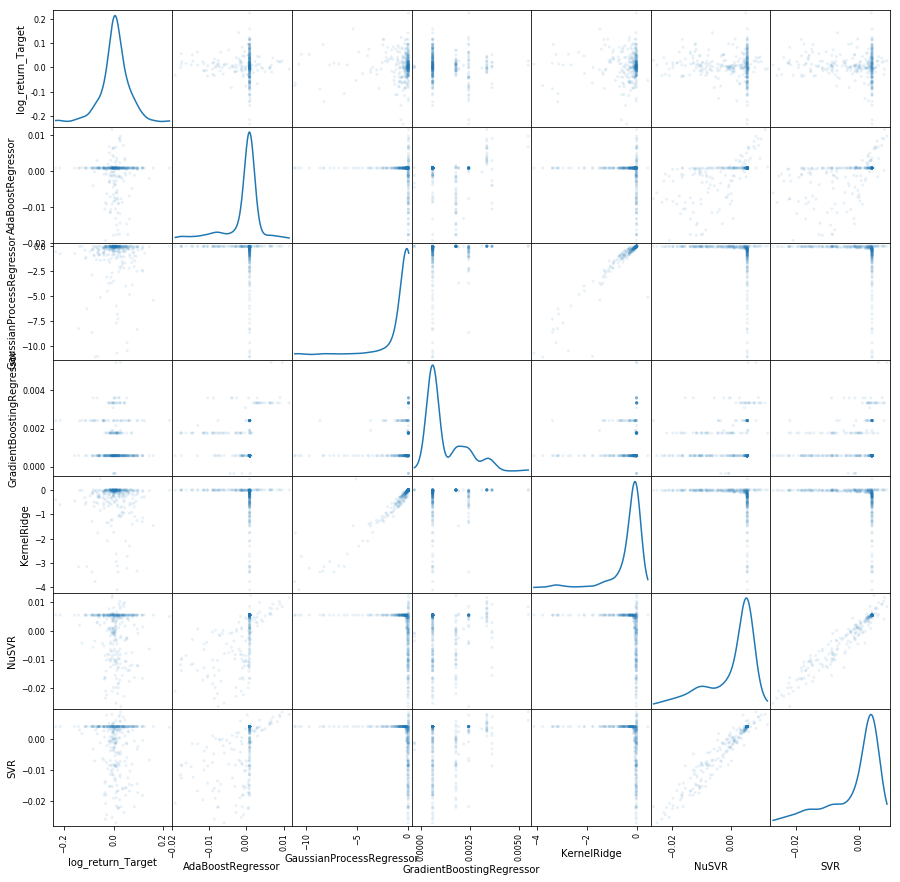

In [13]:
scatter_matrix(results_ML,alpha=0.1,figsize=(15,15),diagonal = 'kde')

In [26]:

def soft_threshold(X, thresh=0):

    #return 
    return np.sign(X.clip(0)).astype(int)
buy_sell_results=results_ML.apply(soft_threshold,axis=0,raw=True)
buy_sell_results.head()

,log_return_Target,AdaBoostRegressor,GaussianProcessRegressor,GradientBoostingRegressor,KernelRidge,NuSVR,SVR
datetime,,,,,,,
2017-03-30,1,1,1,1,1,1,1
2017-03-31,0,0,0,0,0,0,0
2017-04-01,1,0,0,0,0,0,0
2017-04-02,1,0,0,0,0,0,0
2017-04-03,1,1,1,1,1,1,1


In [15]:

def measure(metric,result,target='log_return_Target',**kwargs):
    meassures={}
    for column in result:
        meassures[column]=metric(result[target], result[column],**kwargs)
        
    #return (np.absolute(X) - thresh).clip(0) 
    return pd.DataFrame(meassures,index=[metric.__str__()])

measure_r2=measure(r2_score,results_ML)
measure_r2


,AdaBoostRegressor,GaussianProcessRegressor,GradientBoostingRegressor,KernelRidge,NuSVR,SVR,log_return_Target
<function r2_score at 0x1a0a892048>,-0.027974,-1463.678497,-0.014185,-211.788538,-0.058972,-0.070533,1.0


In [16]:
measure_accuracy_score=measure(accuracy_score,buy_sell_results)
measure_accuracy_score

,AdaBoostRegressor,GaussianProcessRegressor,GradientBoostingRegressor,KernelRidge,NuSVR,SVR,log_return_Target
<function accuracy_score at 0x1a0a857b70>,0.526786,0.425595,0.574405,0.434524,0.491071,0.485119,1.0


In [17]:
measure_f1_score=measure(f1_score,buy_sell_results)
measure_f1_score

,AdaBoostRegressor,GaussianProcessRegressor,GradientBoostingRegressor,KernelRidge,NuSVR,SVR,log_return_Target
<function f1_score at 0x1a0a857ea0>,0.652079,0.19917,0.728653,0.221311,0.595745,0.581114,1.0


In [18]:
datasetD.date_index[0]

Timestamp('2013-07-02 00:00:00')

In [19]:
rows,=datasetD.y_test.shape
resultsD=pd.DataFrame(datasetD.y_test, index =datasetD.date_index[len(datasetD.date_index)-rows:],columns=['log_return_Target'])
resultsD['DeepLearning']=deeplearning_model.predict(datasetD.X_test)
resultsD=inverse_transform(resultsD)
resultsD.head()

,log_return_Target,DeepLearning
datetime,,
2017-04-02,-0.000816,-0.001218
2017-04-03,0.018817,0.002232
2017-04-04,-0.019361,0.000178
2017-04-05,0.020898,-0.000169
2017-04-07,-0.015272,-0.000666


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22d3ebe0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c22f6fb00>]], dtype=object)

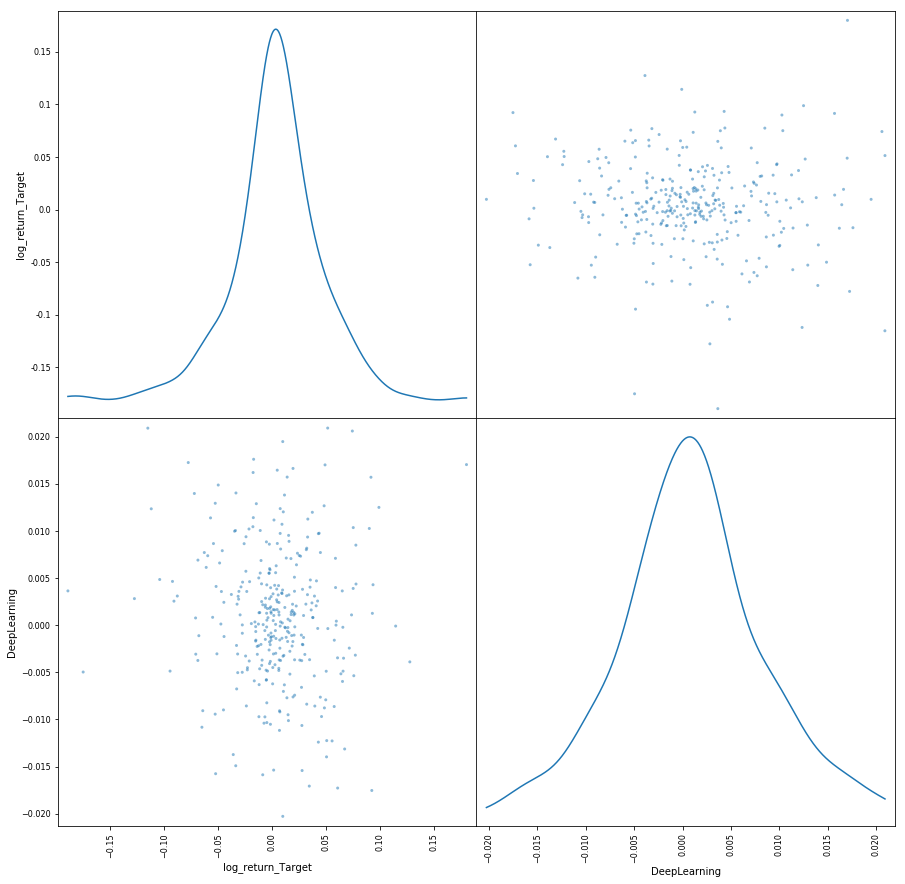

In [20]:
scatter_matrix(resultsD,alpha=0.5,figsize=(15,15),diagonal = 'kde')

In [21]:
buy_sell_resultsD=resultsD.apply(soft_threshold,axis=0,raw=True)

In [22]:
measure_r2D=measure(r2_score,resultsD)
measure_r2D

,DeepLearning,log_return_Target
<function r2_score at 0x1a0a892048>,-0.055141,1.0


In [23]:
measure_accuracy_scoreD=measure(accuracy_score,buy_sell_resultsD)
measure_accuracy_scoreD

,DeepLearning,log_return_Target
<function accuracy_score at 0x1a0a857b70>,0.487952,1.0


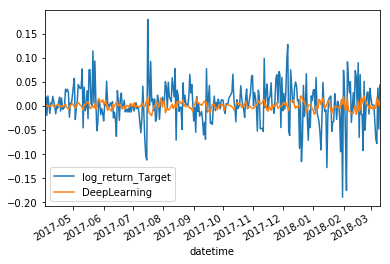

In [24]:
resultsD.plot()

In [27]:
datasetArima.X_test.head()

,log_return
datetime,
2017-03-30,-0.008559
2017-03-31,0.006164
2017-04-01,-0.002237
2017-04-02,0.005027
2017-04-03,0.000477


In [ ]:
def test_arima(X_test,model):
    predictions=[]
    for t in range(len(X_test)):
        model_fit = model.fit(disp=0)
        output = model.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = X_test[t]
        history.append(obs)

In [ ]:
def test_arima(X_test,model):
    predictions=[]
    for t in range(len(X_test)):
        model_fit = model.fit(disp=0)
        output = model.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = X_test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))

In [38]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1342
Model:                     ARMA(6, 0)   Log Likelihood                2259.678
Method:                       css-mle   S.D. of innovations              0.045
Date:                Tue, 12 Jun 2018   AIC                          -4503.356
Time:                        17:23:53   BIC                          -4461.740
Sample:                             0   HQIC                         -4487.766
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      1.483      0.138      -0.001       0.004
ar.L1.y       -0.0718      0.027     -2.632      0.009      -0.125      -0.018
ar.L2.y        0.0167      0.027      0.611      0.541      -0.037       0.070
ar.L3.y       -0.0601      0.027     -2.206      0.028      -0.113      -0.007
ar.L4.y        0.0800      0.027      2.940      0.003       0.027       0.133
ar.L5.y        0.0559      0.027      2.049      0.041       0.002       0.109
ar.L6.y        0.0393      0.027      1.441      0.150      -0.014       0.093
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4988           -0.0000j            1.4988           -0.0000
AR.2            0.5251           -1.4702j            1.5611           -0.1954
AR.3            0.5251           +1.4702j            1.5611            0.1954
AR.4           -1.5997           -0.0000j            1.5997           -0.5000
AR.5           -1.1863           -1.7169j            2.0869           -0.3462
AR.6           -1.1863           +1.7169j            2.0869            0.3462
-----------------------------------------------------------------------------
"""

In [55]:
rows_trained,colums=datasetArima.X_train.shape
rows_tested,colums_tested=datasetArima.X_test.shape
rows_tested

336

In [74]:
arima.predict(start=1342,end=1380)

array([-0.00119563, -0.00147151,  0.00298025,  0.00406483,  0.00323759,
        0.00170349,  0.00161449,  0.00196987,  0.0022044 ,  0.00207244,
        0.00193906,  0.00189552,  0.00193948,  0.00196013,  0.00195316,
        0.00193524,  0.00193101,  0.00193383,  0.00193696,  0.00193602,
        0.00193436,  0.00193356,  0.00193389,  0.00193416,  0.00193413,
        0.00193393,  0.00193384,  0.00193385,  0.00193389,  0.00193389,
        0.00193387,  0.00193385,  0.00193385,  0.00193386,  0.00193386,
        0.00193386,  0.00193385,  0.00193385,  0.00193385])

In [68]:
arima.forecast()

(array([-0.00119563]),
 array([ 0.04492426]),
 array([[-0.08924556,  0.0868543 ]]))